<a href="https://colab.research.google.com/github/AmulPatil/Case-Studies/blob/master/Classification_of_MNIST_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To Achieve two main objectives for this script to classify MNIST dataset,they are:


*   Minimum number of parameters usage in the Neural Network
*   Achieve high accuracy,Since its balanced dataset we will focus on accuracy as metrics to improve



In [0]:
!pip install -U keras

     |████████████████████████████████| 378kB 8.0MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


# **Import Libraries and modules**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler,ModelCheckpoint
from keras.layers import Activation

import numpy as np
from matplotlib import pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
%matplotlib inline

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


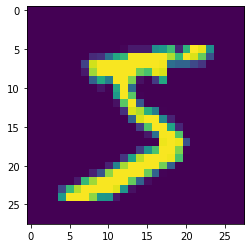

In [0]:
print (X_train.shape)
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Convert data type to 32-bit precision which is required for  training a neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0


In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

**Initial Structure of the Model**

lets build a structure where we can cover atleast Receptive Field of around 28 since we have 28 image size for Mnist dataset.
And to cover more iteration at one go we are clubbing summary and training logs altogether in one cell

In [0]:
model = Sequential()
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 24)        3480      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 10)        250       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 32)          2912      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 32)         

In [0]:
#Result of first iteration
print(model.evaluate(X_test, Y_test, verbose=0))

[0.03203787759745319, 0.989799976348877]


Accuracy of First model came around 98.89% for about 10 epochs with only 9,830 parameters to train ,Nice metrics for first iteration of experiments

#Second Iteration of Experiment:
lets try to increase the batch size & include Batchnorm & reduce the channels to the above structure and observe any improvement in test accuracy

In [0]:
model = Sequential() 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(12, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(14, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=256, epochs=15, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 12)        876       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 14)        1526      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 14)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 10)       

In [0]:
#Result of first iteration
print(model.evaluate(X_test, Y_test, verbose=0))

[0.042138277958368414, 0.9876999855041504]


It wasn't an improvement over the last structure we build but the model did pretty good with less number of parameters involved
####so just to achive accuracy greater then 99.0% on unseen dataset we make below changes to the architecture and the parameters of the model


*   Normalize the Image Initially
*   Increase number of parameters of the model
*   Reduce Learning rate once the Accuracy doesn't show any improvements






#Third Iteration of Experiment:

In [0]:
#Image Normalization
gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen = ImageDataGenerator()
train_generator = gen.flow(X_train, Y_train, batch_size=32)
test_generator = gen.flow(X_test, Y_test, batch_size=32)

In [0]:
model = Sequential()
 
model.add(Convolution2D(16, 3, 3,  input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1)) #22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)


model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit_generator(train_generator,  epochs=15, 
                    validation_data=test_generator,  callbacks=[LearningRateScheduler(scheduler, verbose=1)])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/u

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)       

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1875/1875 [==============================] - 35s 18ms/step - loss: 0.5607 - accuracy: 0.8370 - val_loss: 0.0307 - val_accuracy: 0.9837
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3905 - accuracy: 0.8726 - val_loss: 0.0703 - val_accuracy: 0.9901
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3556 - accuracy: 0.8812 - val_loss: 0.0144 - val_accuracy: 0.9902
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3388 - accuracy: 0.8828 - val_loss: 0.0105 - val_accuracy: 0.9892
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3335 - accuracy: 0.8837 - val_loss: 0.0088 - va

In [0]:
print(model.evaluate(X_test, Y_test, verbose=0))

[0.02410577271617949, 0.9940999746322632]


**The Final Accuracy of 99.409% reached,with around 16K parameters in the model**

Let us see count of images  predicted correctly/incorrectly by the model

In [0]:
# see which we predicted correctly and which not
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)
actual_labelled = np.argmax(Y_test,axis=1)
correct_indices = np.nonzero(pred_digits == actual_labelled)[0]
incorrect_indices = np.nonzero(pred_digits != actual_labelled)[0]
print("classified correctly :- ",len(correct_indices) ," classified incorrectly: -" ,len(incorrect_indices),)


classified correctly :-  9941  classified incorrectly: - 59


Now let us see which are Correctly classified images

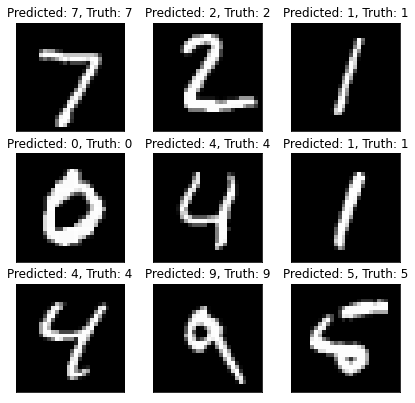

In [0]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)
# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(pred_digits[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])


Now let us see which are missclassified images

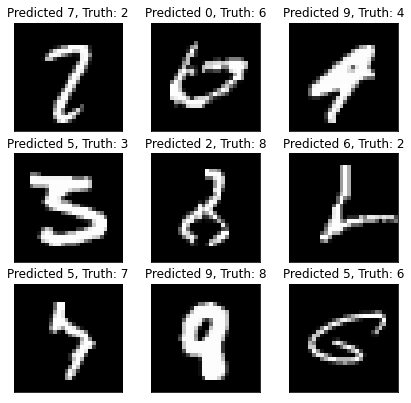

In [0]:

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(pred_digits[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

##This is Starter Script for Image classification.In the Next script we will Work on Cifar10 Dataset.
Note: Some of the regularization technique's are ignored for this case, like image augmentation technique's which would help in reducing number of parameters in the model aswell as achieve high accuracy simulatneously which would be carried out in the next script for difficult tasks.